In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
auto_mpg_df = pd.read_csv('C:\\Users\\Akhil_S_Bhat\\Documents\\AIML\\Machine_Learning\\Supervised Learning\\Classification\\Data\\2_Auto_Mpg_Data\\auto-mpg.csv')

In [64]:
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [65]:
auto_mpg_df['origin'].replace([1,2,3],['US','Europe','Asia'],inplace=True)

In [66]:
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [67]:
auto_mpg_df = pd.get_dummies(auto_mpg_df, columns=['origin'])

In [68]:
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_Asia,origin_Europe,origin_US
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,ford torino,0,0,1


In [69]:
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower']!='?']

In [70]:
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(int)

In [71]:
y = auto_mpg_df['mpg']

In [72]:
X = auto_mpg_df[['displacement','horsepower','weight','acceleration','origin_Asia','origin_Europe','origin_US']]

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [74]:
dt = DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=3)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
X_train[X_train['horsepower']!='?']

,displacement,horsepower,weight,acceleration,origin_Asia,origin_Europe,origin_US
260,225.0,110,3620,18.7,0,0,1
184,140.0,92,2572,14.9,0,0,1
174,171.0,97,2984,14.5,0,0,1
64,318.0,150,4135,13.5,0,0,1
344,86.0,64,1875,16.4,0,0,1
...,...,...,...,...,...,...,...
72,304.0,150,3892,12.5,0,0,1
107,232.0,100,2789,15.0,0,0,1
272,151.0,85,2855,17.6,0,0,1
352,98.0,65,2380,20.7,0,0,1


In [77]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(313, 7)
(313,)
(79, 7)
(79,)


In [78]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [79]:
y_pred = dt.predict(X_test)

In [80]:
mse_dt = mean_squared_error(y_pred,y_test)
rmse_dt = (mse_dt) ** (1/2)
print('Test set RMSE:',rmse_dt)

Test set RMSE: 4.325225689876554


## Apply Cross Validation to check for Variance and Bias of the model

In [81]:
dt = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.26,random_state=1)

In [82]:
MSE_CV_Scores = - cross_val_score(dt,X_train,y_train,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)

In [83]:
RMSE_CV = (MSE_CV_Scores.mean())**(1/2)

In [84]:
print('CV RMSE:',RMSE_CV)

CV RMSE: 4.448997602850385


In [85]:
dt.fit(X_train,y_train)
y_pred_train = dt.predict(X_train)
RMSE_train = (mean_squared_error(y_train,y_pred_train))**(1/2)

In [86]:
print('Train set RMSE:',RMSE_train)

Train set RMSE: 4.248965175393735


In [87]:
dt.fit(X_train,y_train)
y_pred_test = dt.predict(X_test)
RMSE_train = (mean_squared_error(y_test,y_pred_test))**(1/2)

In [88]:
print('Test set RMSE:',RMSE_train)

Test set RMSE: 4.962353374604372


## Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rf = RandomForestRegressor(n_estimators=400,min_samples_leaf=0.12,random_state=1)

In [91]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rmse_test = mean_squared_error(y_test,y_pred)**(1/2)
print('Test set RMSE: ',rmse_test)

Test set RMSE:  4.1458050772077835


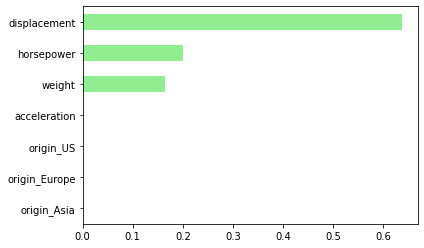

In [92]:
importances_rf = pd.Series(rf.feature_importances_,index=X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh',color='lightgreen')
plt.show()

## Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=1)

In [95]:
gbt.fit(X_train,y_train)
y_pred = gbt.predict(X_test)
rmse_test = mean_squared_error(y_test,y_pred) ** (1/2)

In [96]:
print('Gradient Booosting Test Set RMSE: ',rmse_test)

Gradient Booosting Test Set RMSE:  3.827655466579916


## Stochastic Gradient Boosting

In [97]:
sgbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=1,subsample=0.8,max_features=0.2)

In [98]:
sgbt.fit(X_train,y_train)
y_pred = sgbt.predict(X_test)
rmse_test = mean_squared_error(y_test,y_pred) ** (1/2)

In [99]:
print('Stochastic Gradient Booosting Test Set RMSE: ',rmse_test)

Stochastic Gradient Booosting Test Set RMSE:  3.7688352025242846


## Hyperparameter Tuning using GridSearchCV

In [100]:
rf = RandomForestRegressor(random_state=1)

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
params_rf = {
    'n_estimators':[300,400,500],
    'max_depth':[4,6,8],
    'min_samples_leaf':[0.1,0.2],
    'max_features':['log2','sqrt']
}

grid_rf = GridSearchCV(estimator=rf,
                      param_grid=params_rf,
                      cv=3,
                      scoring='neg_mean_squared_error',
                      verbose=1,
                      n_jobs=-1)

In [103]:
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [104]:
best_hyperparams = grid_rf.best_params_
print('Best Hyperparameters: ',best_hyperparams)

Best Hyperparameters:  {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 300}


In [105]:
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)
rmse_test = mean_squared_error(y_test,y_pred)**(1/2)
print('Test set RMSE: ',rmse_test)

Test set RMSE:  3.9837656048427585


In [106]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [107]:
import warnings
warnings.filterwarnings('ignore')
scaled_X = NormalizeData(X)

scaled_y = NormalizeData(y)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size =0.3, random_state = 31)

## XG Boost using Tree Based Learners

In [108]:
import xgboost as xgb

In [110]:
warnings.filterwarnings('ignore')
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',seed=123,n_estimators=10)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds,y_test))
print('RMSE: %f' %(rmse))

RMSE: 0.099364


## XG Boost using Linear Base Learners

In [111]:
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)
params = {'booster':'gblinear','objective':'reg:squarederror'}
xg_reg = xgb.train(dtrain=DM_train,params=params,num_boost_round=5)
preds = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print('RMSE: %f' %(rmse))

RMSE: 0.115535


## XG Boost with Cross Validation

In [112]:
warnings.filterwarnings('ignore')
housing_dmatrix = xgb.DMatrix(data=scaled_X,label=scaled_y)
params={'objective':'reg:squarederror','max_depth':4}
cv_results = xgb.cv(dtrain=housing_dmatrix,params=params,nfold=4,num_boost_round=5,metrics='rmse',as_pandas=True,seed=123)
print(cv_results['test-rmse-mean'].tail(1))

4    0.111014
Name: test-rmse-mean, dtype: float64


In [113]:
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)
print(cv_results['test-mae-mean'].tail(1))

4    0.084715
Name: test-mae-mean, dtype: float64


## Adding L2 Regularization to XG Boost model

In [114]:
housing_dmatrix = xgb.DMatrix(data=scaled_X,label=scaled_y)
reg_params = [1,10,100]
params = {'objective':'reg:squarederror','max_depth':4}
rmse_l2 = []
for reg in reg_params:
    params['lambda'] = reg
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix,params=params,nfold=4,num_boost_round=5,metrics='rmse',as_pandas=True,seed=123)
    rmse_l2.append(cv_results_rmse['test-rmse-mean'].tail(1).values[0])
    
print(pd.DataFrame(list(zip(reg_params,rmse_l2)),columns=['l2','rmse']))    

    l2      rmse
0    1  0.111014
1   10  0.115086
2  100  0.142772


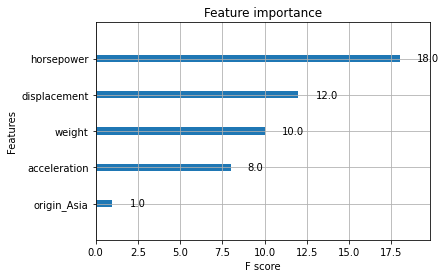

In [116]:
xg_reg = xgb.train(params=params,dtrain=housing_dmatrix,num_boost_round=5)
xgb.plot_importance(xg_reg)
plt.show()

## Hyperparameter Tuning with GridSearchCV

In [126]:
gbm_param_grid={
    'colsample_bytree':np.linspace(0,1,25).tolist(),
    'n_estimators' : np.arange(10,50).tolist(),
    'max_depth': np.arange(2,6).tolist()
}

In [128]:
gbm = xgb.XGBRegressor()

In [129]:
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,scoring='neg_mean_squared_error',cv=4,verbose=1)

In [130]:
grid_mse.fit(scaled_X,scaled_y)

Fitting 4 folds for each of 4000 candidates, totalling 16000 fits


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                              0.5416666666666666,
                                              0.5833333333333333, 0.625,
                                              0.6666666666666666,
                                              0.708

In [131]:
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'colsample_bytree': 0.5833333333333333, 'max_depth': 4, 'n_estimators': 44}
Lowest RMSE found:  0.12619695714165444
